# Observations and Insights 

## Observation 1
For the drug regimen Capomulin, there is a strong positive correlation between average tumour volume and weight of the mouse, meaning that the more the mouse weighs, the more likely the average tumour volume for the mouse will be higher as well.

## Observation 2
The treatment Ramicane had the lowest median tumour size at the end timepoints for each mouse, therefore it can be assumed that Ramicane was the most effective treatment.

## Observation 3
For Mouse s185, who underwent treatment with Capomulin, their tumor volume decreased by nearly 50% (45.0 at timepoint 0 to 23.3 at timepoint 45).

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on = ['Mouse ID'], how = 'outer')
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining step.

In [2]:
# Checking the number of mice.
#Count number of mice based on unique mouse ID
num_mice = int(len(study_data["Mouse ID"].unique()))
print(f' Number of mice is {num_mice}')

 Number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = study_data[study_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]

dup_mice_id = dup_mice['Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Using curly hyphen, it inverts the .isin function of Pandas
cleaned_data = study_data[~study_data["Mouse ID"].isin(dup_mice_id)]

cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_data["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#Capomulin, Ramicane, Infubinol, Ceftamin

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grp = cleaned_data.groupby('Drug Regimen')
drug_grp
# Assemble the resulting series into a single summary dataframe.
drug_mean = drug_grp["Tumor Volume (mm3)"].mean()
drug_median = drug_grp["Tumor Volume (mm3)"].median()
drug_var = drug_grp["Tumor Volume (mm3)"].var()
drug_std = drug_grp["Tumor Volume (mm3)"].std()
drug_sem = drug_grp["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({'Mean': drug_mean, 
                            'Median': drug_median, 
                            'Variance': drug_var, 
                            'Standard Deviation': drug_std, 
                            'SEM': drug_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#creating a new variable to store summary stats. Grouping the cleaned data by 'Drug Regimen' and then
#Using .agg function to apply numpy calculations to the 'Tumor Volume (mm3)' column
summary_stats_agg = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                              ['mean', 'median','var', 'std', 'sem']})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of timepoints')

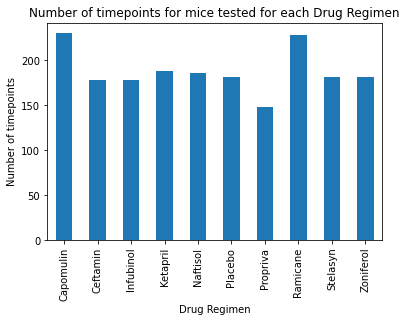

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Need to count number of timepoints per drug regimen
num_timepoints = drug_grp['Timepoint'].count()
num_timepoints

num_timepoints.plot(kind = 'bar', 
                    title = 'Number of timepoints for mice tested for each Drug Regimen')
#Add ylabel
plt.ylabel('Number of timepoints')

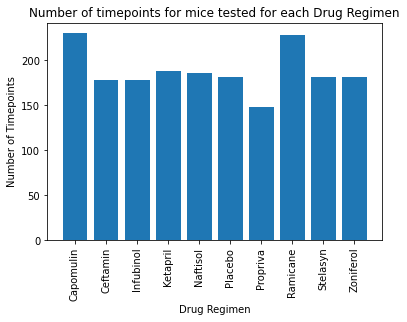

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#define X and Y axis variables
x_values = num_timepoints.index.values
y_values = num_timepoints.values
# print(x_values)
# print(y_values)

plt.bar(x_values, y_values) 
plt.title("Number of timepoints for mice tested for each Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(x_values, rotation = 90)
plt.show()

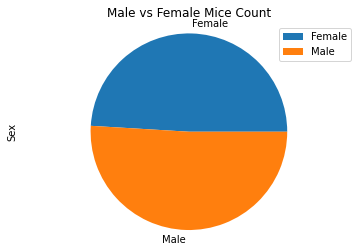

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Group by sex
sex_grp = cleaned_data.groupby('Sex')
#Count number of mice by sex
sex_count = sex_grp['Sex'].count()
sex_count

#Create pie chart
sex_pie = sex_count.plot(kind = 'pie', y="Sex", title="Male vs Female Mice Count")
plt.axis('equal')
plt.legend(loc = 'upper right')

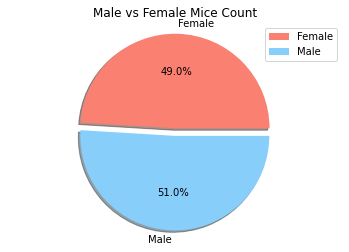

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Add a few more variables to assist with the pie plot generation
colors = ['salmon', 'lightskyblue']
sex_category = sex_count.index.values
explode = (0, 0.08)

plt.pie(sex_count, explode = explode, labels = sex_category, colors = colors, autopct="%1.1f%%", shadow = True)
plt.axis('equal')
plt.title('Male vs Female Mice Count')
plt.legend(loc = 'upper right')
plt.show()


## Quartiles, Outliers and Boxplots

Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.


Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data.


Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.


Determine outliers by using the upper and lower bounds, and then print the results.

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create a list that holds the treatment names
treatment_name = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments_df  = pd.DataFrame()

for treatment in treatment_name:
    row = cleaned_data.loc[cleaned_data["Drug Regimen"] == treatment, :]
    treatments_df = treatments_df.append(row)
    
treatments_df

max_timepoint = treatments_df.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, cleaned_data, on = ("Mouse ID", "Timepoint"), how = "left")

pd.set_option('display.max_rows', None)
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#CAPOMULIN
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
# capomulin_df
capomulin_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lowerbound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upperbound = capomulin_upperq + (1.5*capomulin_iqr) 

print(f' The lower quartile for Capomulin is {capomulin_lowerq}')
print(f' The upper quartile for Capomulin is {capomulin_upperq}')
print(f' The lower bound for Capomulin is {capomulin_lowerbound}')
print(f' The upper bound for Capomulin is {capomulin_upperbound}')
print(f' The IQR for Capomulin is {capomulin_iqr}')
    
# Determine outliers using upper and lower bounds
capomulin_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] < capomulin_lowerbound) | 
                                      (capomulin_df["Tumor Volume (mm3)"] > capomulin_upperbound), :]

print(f'There are {capomulin_outliers["Mouse ID"].count()} outliers for Capomulin')

 The lower quartile for Capomulin is 32.37735684
 The upper quartile for Capomulin is 40.1592203
 The lower bound for Capomulin is 20.70456164999999
 The upper bound for Capomulin is 51.83201549
 The IQR for Capomulin is 7.781863460000004
There are 0 outliers for Capomulin


In [15]:
#ramicane
ramicane_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane",:]
# ramicane_df
ramicane_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lowerbound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upperbound = ramicane_upperq + (1.5*ramicane_iqr) 

print(f' The lower quartile for Ramicane is {ramicane_lowerq}')
print(f' The upper quartile for Ramicane is {ramicane_upperq}')
print(f' The lower bound for Ramicane is {ramicane_lowerbound}')
print(f' The upper bound for Ramicane is {ramicane_upperbound}')
print(f' The IQR for Ramicane is {ramicane_iqr}')
    
# Determine outliers using upper and lower bounds
ramicane_outliers = ramicane_df.loc[(ramicane_df["Tumor Volume (mm3)"] < ramicane_lowerbound) | 
                                      (ramicane_df["Tumor Volume (mm3)"] > ramicane_upperbound), :]

print(f'There are {ramicane_outliers["Mouse ID"].count()} outliers for Ramicane')

 The lower quartile for Ramicane is 31.56046955
 The upper quartile for Ramicane is 40.65900627
 The lower bound for Ramicane is 17.912664470000003
 The upper bound for Ramicane is 54.30681135
 The IQR for Ramicane is 9.098536719999998
There are 0 outliers for Ramicane


In [16]:
#Infubinol
infubinol_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol",:]
# Infubinol_df
infubinol_quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lowerbound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upperbound = infubinol_upperq + (1.5*infubinol_iqr) 

print(f' The lower quartile for Infubinol is {infubinol_lowerq}')
print(f' The upper quartile for Infubinol is {infubinol_upperq}')
print(f' The lower bound for Infubinol is {infubinol_lowerbound}')
print(f' The upper bound for Infubinol is {infubinol_upperbound}')
print(f' The IQR for Infubinol is {infubinol_iqr}')
    
# Determine outliers using upper and lower bounds
infubinol_outliers = infubinol_df.loc[(infubinol_df["Tumor Volume (mm3)"] < infubinol_lowerbound) | 
                                      (infubinol_df["Tumor Volume (mm3)"] > infubinol_upperbound), :]

print(f'There are {infubinol_outliers["Mouse ID"].count()} outliers for Infubinol')

 The lower quartile for Infubinol is 54.04860769
 The upper quartile for Infubinol is 65.52574285
 The lower bound for Infubinol is 36.83290494999999
 The upper bound for Infubinol is 82.74144559000001
 The IQR for Infubinol is 11.477135160000003
There are 1 outliers for Infubinol


In [17]:
#ceftamin
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin",:]
# ceftamin_df
ceftamin_quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lowerbound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upperbound = ceftamin_upperq + (1.5*ceftamin_iqr) 

print(f' The lower quartile for Ceftamin is {ceftamin_lowerq}')
print(f' The upper quartile for Ceftamin is {ceftamin_upperq}')
print(f' The lower bound for Ceftamin is {ceftamin_lowerbound}')
print(f' The upper bound for Ceftamin is {ceftamin_upperbound}')
print(f' The IQR for Ceftamin is {ceftamin_iqr}')
    
# Determine outliers using upper and lower bounds
ceftamin_outliers = ceftamin_df.loc[(ceftamin_df["Tumor Volume (mm3)"] < ceftamin_lowerbound) | 
                                      (ceftamin_df["Tumor Volume (mm3)"] > ceftamin_upperbound), :]

print(f'There are {ceftamin_outliers["Mouse ID"].count()} outliers for Ceftamin')

 The lower quartile for Ceftamin is 48.72207785
 The upper quartile for Ceftamin is 64.29983003
 The lower bound for Ceftamin is 25.355449580000002
 The upper bound for Ceftamin is 87.66645829999999
 The IQR for Ceftamin is 15.577752179999997
There are 0 outliers for Ceftamin


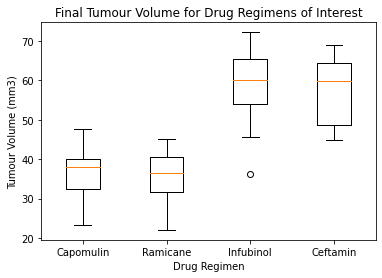

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [capomulin_df['Tumor Volume (mm3)'], 
                ramicane_df['Tumor Volume (mm3)'], 
                infubinol_df['Tumor Volume (mm3)'], 
                ceftamin_df['Tumor Volume (mm3)']]
boxplot_data
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumour Volume for Drug Regimens of Interest")
ax1.set_ylabel("Tumour Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(boxplot_data, labels = treatment_name, widths = 0.4, vert = True)
plt.show()


## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

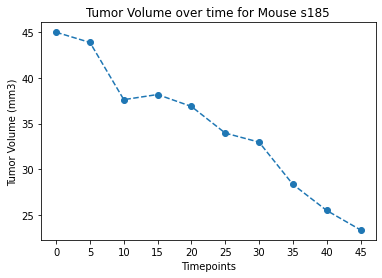

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find a mouse treated with Capomulin
cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin", :].head()

#Using mouse ID s185
s185_data = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] =="s185"),:]
print(s185_data)

plt.plot(s185_data['Timepoint'], s185_data["Tumor Volume (mm3)"], ls = '--', marker = 'o')
plt.title('Tumor Volume over time for Mouse s185')
plt.xlabel('Timepoints')
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(s185_data['Timepoint'])
plt.show()

Text(0.5, 1.0, 'Scatter plot of average mouse tumour volume against weight')

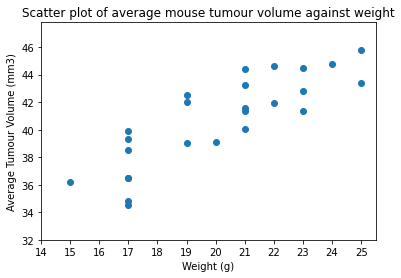

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Using cleaned_data dataframe
#Set x and y values. Y values is average tumour volume of each mouse
capomulin_data_orig = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin",:]
capomulin_data_orig

#Find average tumour volume per mouse and put into dataframe
cap_scatter_data = capomulin_data_orig.groupby('Mouse ID').mean()

x_values = cap_scatter_data['Weight (g)']
y_values = cap_scatter_data["Tumor Volume (mm3)"]
x_axis = np.arange(14, max(x_values) + 1, 1)

plt.scatter(x_values, y_values)
plt.ylabel('Average Tumour Volume (mm3)')
plt.ylim(32, max(y_values) + 2)
plt.xlabel("Weight (g)")
plt.xticks(x_axis)
plt.title('Scatter plot of average mouse tumour volume against weight')

## Correlation and Regression

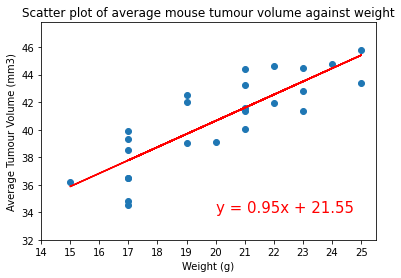

The correlation between weight and average tumour volume is 0.84
The r-squared value is 0.7088568047708717


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.ylabel('Average Tumour Volume (mm3)')
plt.ylim(32, max(y_values) + 2)
plt.xlabel("Weight (g)")
plt.xticks(x_axis)
plt.title('Scatter plot of average mouse tumour volume against weight')
plt.annotate(line_eq, (20, 34), fontsize = 15, color = 'red')
plt.show()
#determine correlation coefficient using Pearsons correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between weight and average tumour volume is {round(correlation[0],2)}')
print(f'The r-squared value is {rvalue**2}')